### 1.Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [74]:
from sklearn.metrics import accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV

### 2.Loading the dataset

In [6]:
df_train=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Kaggle/autism/train.csv')
df_train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [7]:
df_test=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Kaggle/autism/test.csv')
df_test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,1,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,0,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,1,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,0,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,0,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


In [8]:
df_train.shape

(800, 22)

In [9]:
df_test.shape

(200, 21)

### 3.Exploratory Data Analysis

In [10]:
#We will merge the train and test datasets for the ease of doing EDA part. During model building, we can separate it.
df_train['source']='train'
df_test['source']='test'

df_autism=pd.concat([df_train,df_test],ignore_index=True)

In [11]:
df_autism.shape

(1000, 23)

In [12]:
df_autism.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,source
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0.0,train
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0.0,train
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1.0,train
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0.0,train
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0.0,train


In [13]:
df_autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1000 non-null   int64  
 1   A1_Score         1000 non-null   int64  
 2   A2_Score         1000 non-null   int64  
 3   A3_Score         1000 non-null   int64  
 4   A4_Score         1000 non-null   int64  
 5   A5_Score         1000 non-null   int64  
 6   A6_Score         1000 non-null   int64  
 7   A7_Score         1000 non-null   int64  
 8   A8_Score         1000 non-null   int64  
 9   A9_Score         1000 non-null   int64  
 10  A10_Score        1000 non-null   int64  
 11  age              1000 non-null   float64
 12  gender           1000 non-null   object 
 13  ethnicity        1000 non-null   object 
 14  jaundice         1000 non-null   object 
 15  austim           1000 non-null   object 
 16  contry_of_res    1000 non-null   object 
 17  used_app_before

In [14]:
df_autism.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,800.000000
mean,340.500000,0.563000,0.535000,0.45500,0.41700,0.40600,0.311000,0.402000,0.516000,0.504000,0.62200,27.976608,8.564116,0.201250
std,240.397673,0.496263,0.499023,0.49822,0.49331,0.49133,0.463134,0.490547,0.499994,0.500234,0.48513,15.989690,4.786261,0.401185
min,1.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,2.718550,-6.137748,0.000000
25%,125.750000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,16.881550,5.324835,0.000000
50%,300.500000,1.000000,1.000000,0.00000,0.00000,0.00000,0.000000,0.000000,1.000000,1.000000,1.00000,24.033245,9.638840,0.000000
75%,550.250000,1.000000,1.000000,1.00000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,35.065799,12.511012,0.000000
max,800.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,89.461718,15.853126,1.000000


In [15]:
#We can find that there are no missing values and outliers.

In [16]:
df_autism

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,source
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0.0,train
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0.0,train
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1.0,train
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0.0,train
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0.0,train
5,6,1,0,0,0,0,1,0,0,1,1,31.527964,m,Middle Eastern,no,no,Jordan,no,9.562117,18 and more,Self,0.0,train
6,7,1,0,0,0,0,0,1,1,1,0,28.427971,f,Pasifika,no,no,United Kingdom,no,7.984569,18 and more,Self,0.0,train
7,8,1,1,1,1,1,1,1,0,1,1,26.484494,m,Black,no,yes,United States,no,13.237898,18 and more,Self,1.0,train
8,9,1,1,1,1,0,0,0,1,1,1,48.203459,m,White-European,no,no,Brazil,no,-1.755774,18 and more,Self,0.0,train
9,10,0,0,0,0,0,0,0,1,0,1,24.167945,f,Others,yes,no,New Zealand,no,14.922570,18 and more,Self,0.0,train


There are some columns with incorrect spelling,let's correct them.

In [17]:
df_autism=df_autism.rename(columns={'austim':'autism','contry_of_res':'country_of_res'})

In [18]:
df_autism['ethnicity'].value_counts()

White-European     323
?                  257
Middle Eastern     124
Asian               84
Black               50
South Asian         43
Pasifika            40
Others              36
Latino              21
Hispanic            11
Turkish              8
others               3
Name: ethnicity, dtype: int64

We can find that some values are marked as ? indicating missing values.So we need to replace it based on their country of residence.

We can find that there are three countries with single data (986 philippines,223 angola,849 lebanon) and it is a missing value. Since we have no information about the ethnicity, we can put it in others category.

In [19]:
#df_autism=df_autism.drop([223,849,986])

In [20]:
df_autism.loc[[223,849,986],'ethnicity']='others'

In [21]:
df_autism.shape

(1000, 23)

In [22]:
df_autism['ethnicity']=df_autism['ethnicity'].replace('?',np.nan)

In [23]:
df_autism.isnull().sum()

ID                   0
A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  0
gender               0
ethnicity          254
jaundice             0
autism               0
country_of_res       0
used_app_before      0
result               0
age_desc             0
relation             0
Class/ASD          200
source               0
dtype: int64

We can find that there are missing values in ethnicity column. So, we can fix it by mode values based on the country of res.

In [24]:
df1=df_autism.groupby('country_of_res')['ethnicity'].value_counts().to_frame(name='value')
df1.reset_index(inplace=True)

In [25]:
df1.head()

,country_of_res,ethnicity,value
0,Afghanistan,White-European,6
1,Afghanistan,Middle Eastern,4
2,Afghanistan,Others,2
3,Afghanistan,South Asian,2
4,Afghanistan,Asian,1


In [26]:
def get_mode(country):
    vc=df1.loc[df1.country_of_res==country].max()
    return vc['ethnicity']

In [27]:
df_autism.loc[df_autism.ethnicity.isnull(),'ethnicity']=\
df_autism.loc[df_autism.ethnicity.isnull(),'country_of_res'].apply(lambda x:get_mode(x))

In [28]:
#Checking if missing values are treated or not.
df_autism.isnull().sum()

ID                   0
A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  0
gender               0
ethnicity            0
jaundice             0
autism               0
country_of_res       0
used_app_before      0
result               0
age_desc             0
relation             0
Class/ASD          200
source               0
dtype: int64

There are no missing values now.

In [29]:
#Checking for outliers

In [30]:
df_autism.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,800.000000
mean,340.500000,0.563000,0.535000,0.45500,0.41700,0.40600,0.311000,0.402000,0.516000,0.504000,0.62200,27.976608,8.564116,0.201250
std,240.397673,0.496263,0.499023,0.49822,0.49331,0.49133,0.463134,0.490547,0.499994,0.500234,0.48513,15.989690,4.786261,0.401185
min,1.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,2.718550,-6.137748,0.000000
25%,125.750000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,16.881550,5.324835,0.000000
50%,300.500000,1.000000,1.000000,0.00000,0.00000,0.00000,0.000000,0.000000,1.000000,1.000000,1.00000,24.033245,9.638840,0.000000
75%,550.250000,1.000000,1.000000,1.00000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,35.065799,12.511012,0.000000
max,800.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,89.461718,15.853126,1.000000


We can see that the age column has some outliers present in it. We can convert the age column into categorical column to get rid of outliers.

In [31]:
df_autism['age_cat']=pd.cut(df_autism.age,bins=[1,15,30,60,90],labels=['kids','adoloscent','middle','old'])

In [32]:
df_autism.age_cat.value_counts()

adoloscent    462
middle        295
kids          190
old            53
Name: age_cat, dtype: int64

In [33]:
#Checking for correlation

In [34]:
vcorr=df_autism.corr()

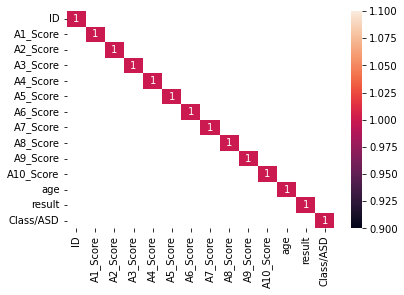

In [35]:
sns.heatmap(vcorr[(vcorr>0.85) | (vcorr<-0.85)],annot=True)
plt.show()

We can find that there is no strong correlation between any features.

In [36]:
#We can drop the age column now since we don't require it for model building.

In [37]:
df_autism=df_autism.drop(['age','age_desc'],axis=1)

In [38]:
#Setting the target column to the format required

In [39]:
df_autism['Class/ASD']=df_autism['Class/ASD'].astype('bool')

In [40]:
df_autism['Class/ASD']=df_autism['Class/ASD'].astype('int')

In [41]:
#creating a backup

In [42]:
df_autism1=df_autism.copy(deep=True)

### 4.Separating the train and test set

In [43]:
df_train=df_autism1.loc[df_autism['source']=='train']
df_test=df_autism1.loc[df_autism['source']=='test']

In [44]:
df_train.shape

(800, 22)

In [45]:
df_test.shape

(200, 22)

In [46]:
df_train1=df_train.drop(['ID','source','country_of_res'],axis=1)
df_test1=df_test.drop(['ID','Class/ASD','source','country_of_res'],axis=1)

In [47]:
df_train1.shape,df_test1.shape

((800, 19), (200, 18))

### 5.Dummy encoding

In [48]:
df_train_dummy=pd.get_dummies(df_train1,drop_first=True)

In [49]:
df_test_dummy=pd.get_dummies(df_test1,drop_first=True)

In [50]:
df_train_dummy.shape,df_test_dummy.shape

((800, 34), (200, 33))

### 6.Splitting into X_train,y_train

In [51]:
X_train=df_train_dummy.drop('Class/ASD',axis=1)

In [52]:
y_train=df_train_dummy['Class/ASD']

In [53]:
X_test=df_test_dummy

In [54]:
X_train.shape,y_train.shape,X_test.shape

((800, 33), (800,), (200, 33))

### 7.Scaling the data

In [55]:
sc=StandardScaler()

In [56]:
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

### 8.Model Building

#### 1.Logistic Regression

In [57]:
lr=LogisticRegression()

In [58]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [59]:
pred_train_result=lr.predict(X_train_scaled)
pred_test_result=lr.predict(X_test_scaled)

In [60]:
print('Training accuracy score is: ',accuracy_score(y_train,pred_train_result))

Training accuracy score is:  0.875


In [61]:
fpr,tpr,thresholds=roc_curve(y_train,pred_train_result)

In [62]:
print('Training AUC is: ',auc(fpr,tpr))

Training AUC is:  0.8055968662214835


In [63]:
submit_lr=pd.DataFrame({'ID':df_test['ID'],'Class/ASD':pred_test_result})

In [64]:
submit_lr.to_csv('autism.submit_lr.csv',index=False)

#### 2.Decision Tree

In [65]:
dt=DecisionTreeClassifier()

In [66]:
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [67]:
pred_train_result=dt.predict(X_train_scaled)
pred_test_result=dt.predict(X_test_scaled)

In [68]:
print('Training accuracy score is: ',accuracy_score(y_train,pred_train_result))

Training accuracy score is:  1.0


In [69]:
fpr,tpr,thresholds=roc_curve(y_train,pred_train_result)

In [70]:
print('Training AUC is: ',auc(fpr,tpr))

Training AUC is:  1.0


In [71]:
submit_dt=pd.DataFrame({'ID':df_test['ID'],'Class/ASD':pred_test_result})

In [72]:
submit_dt.to_csv('autism.submit_dt.csv',index=False)

#### 3. Random Forest

In [75]:
rf=RandomForestClassifier()

In [76]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [77]:
pred_train_result=rf.predict(X_train_scaled)
pred_test_result=rf.predict(X_test_scaled)

In [78]:
print('Training accuracy score is: ',accuracy_score(y_train,pred_train_result))

Training accuracy score is:  1.0


In [79]:
fpr,tpr,thresholds=roc_curve(y_train,pred_train_result)

In [80]:
print('Training AUC is: ',auc(fpr,tpr))

Training AUC is:  1.0


In [81]:
submit_rf=pd.DataFrame({'ID':df_test['ID'],'Class/ASD':pred_test_result})

In [83]:
submit_rf.to_csv('autism.submit_rf.csv',index=False)

#### 4.XGB Classifier

In [84]:
xgb=XGBClassifier()

In [85]:
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [86]:
pred_train_result=xgb.predict(X_train_scaled)
pred_test_result=xgb.predict(X_test_scaled)

In [87]:
print('Training accuracy score is: ',accuracy_score(y_train,pred_train_result))

Training accuracy score is:  0.99875


In [88]:
fpr,tpr,thresholds=roc_curve(y_train,pred_train_result)

In [89]:
print('Training AUC is: ',auc(fpr,tpr))

Training AUC is:  0.9992175273865415


In [90]:
submit_xgb=pd.DataFrame({'ID':df_test['ID'],'Class/ASD':pred_test_result})

In [91]:
submit_xgb.to_csv('autism.submit_xgb.csv',index=False)

#### 5.KNN

In [94]:
k_values=range(3,21)

In [93]:
train_accuracy={}

In [95]:
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    pred_train_results=knn.predict(X_train_scaled)
    pred_test_results=knn.predict(X_test_scaled)
    train_accuracy[k]=accuracy_score(y_train,pred_train_results)

In [97]:
max(train_accuracy.values())

0.8925

In [98]:
max(train_accuracy,key=train_accuracy.get)

3

In [100]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [101]:
pred_train_results=knn.predict(X_train_scaled)
pred_test_results=knn.predict(X_test_scaled)

In [102]:
print('Training accuracy score is: ',accuracy_score(y_train,pred_train_results))

Training accuracy score is:  0.8925


In [103]:
fpr,tpr,thresholds=roc_curve(y_train,pred_train_results)

In [104]:
print('Training AUC is: ',auc(fpr,tpr))

Training AUC is:  0.8351364223991291


In [105]:
submit_knn=pd.DataFrame({'ID':df_test['ID'],'Class/ASD':pred_test_results})

In [106]:
submit_knn.to_csv('autism.submit_knn.csv',index=False)

#### 6.Naive Bayes

In [107]:
gnb=GaussianNB()

In [108]:
gnb.fit(X_train_scaled,y_train)

GaussianNB()

In [109]:
pred_train_result=gnb.predict(X_train_scaled)
pred_test_result=gnb.predict(X_test_scaled)

In [110]:
print('Training accuracy score is: ',accuracy_score(y_train,pred_train_result))

Training accuracy score is:  0.6425


In [111]:
fpr,tpr,thresholds=roc_curve(y_train,pred_train_result)

In [112]:
print('Training AUC is: ',auc(fpr,tpr))

Training AUC is:  0.7692434802049009


In [113]:
submit_gnb=pd.DataFrame({'ID':df_test['ID'],'Class/ASD':pred_test_result})

In [114]:
submit_gnb.to_csv('autism.submit_gnb.csv',index=False)

#### 7.SVC

#### A.Linear Kernel

In [117]:
svc1=SVC(kernel='linear')

In [118]:
svc1.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [119]:
pred_train_result=svc1.predict(X_train_scaled)
pred_test_result=svc1.predict(X_test_scaled)

In [120]:
print('Training accuracy score is: ',accuracy_score(y_train,pred_train_result))

Training accuracy score is:  0.86875


In [121]:
fpr,tpr,thresholds=roc_curve(y_train,pred_train_result)

In [122]:
print('Training AUC is: ',auc(fpr,tpr))

Training AUC is:  0.8063307380514974


In [123]:
submit_svc_linear=pd.DataFrame({'ID':df_test['ID'],'Class/ASD':pred_test_result})

In [124]:
submit_svc_linear.to_csv('autism.submit_svc_linear.csv',index=False)

#### B.Radial Kernel

In [125]:
svc2=SVC(kernel='rbf')

In [126]:
svc2.fit(X_train_scaled,y_train)

SVC()

In [127]:
pred_train_result=svc2.predict(X_train_scaled)
pred_test_result=svc2.predict(X_test_scaled)

In [128]:
print('Training accuracy score is: ',accuracy_score(y_train,pred_train_result))

Training accuracy score is:  0.8975


In [129]:
fpr,tpr,thresholds=roc_curve(y_train,pred_train_result)

In [132]:
print('Training AUC is: ',auc(fpr,tpr))

Training AUC is:  0.8405894303016165


In [133]:
submit_svc_radial=pd.DataFrame({'ID':df_test['ID'],'Class/ASD':pred_test_result})

In [134]:
submit_svc_radial.to_csv('autism.submit_svc_radial.csv',index=False)

#### C.Sigmoid Kernel

In [135]:
svc3=SVC(kernel='sigmoid')

In [136]:
svc3.fit(X_train_scaled,y_train)

SVC(kernel='sigmoid')

In [137]:
pred_train_result=svc3.predict(X_train_scaled)
pred_test_result=svc3.predict(X_test_scaled)

In [138]:
print('Training accuracy score is: ',accuracy_score(y_train,pred_train_result))

Training accuracy score is:  0.85375


In [139]:
fpr,tpr,thresholds=roc_curve(y_train,pred_train_result)

In [140]:
print('Training AUC is: ',auc(fpr,tpr))

Training AUC is:  0.7876485968953819


In [141]:
submit_svc_sigmoid=pd.DataFrame({'ID':df_test['ID'],'Class/ASD':pred_test_result})

In [142]:
submit_svc_sigmoid.to_csv('autism.submit_svc_sigmoid.csv',index=False)

#### D.Poly Kernel

In [143]:
svc4=SVC(kernel='poly')

In [144]:
svc4.fit(X_train_scaled,y_train)

SVC(kernel='poly')

In [145]:
pred_train_result=svc4.predict(X_train_scaled)
pred_test_result=svc4.predict(X_test_scaled)

In [146]:
print('Training accuracy score is: ',accuracy_score(y_train,pred_train_result))

Training accuracy score is:  0.9225


In [147]:
fpr,tpr,thresholds=roc_curve(y_train,pred_train_result)

In [148]:
print('Training AUC is: ',auc(fpr,tpr))

Training AUC is:  0.8748238221600132


In [149]:
submit_svc_poly=pd.DataFrame({'ID':df_test['ID'],'Class/ASD':pred_test_result})

In [150]:
submit_svc_poly.to_csv('autism.submit_svc_poly.csv',index=False)

#### E.Poly Kernel along with GridSearchCV

In [151]:
tuned_parameters={'degree':[2,4,6],'gamma':['auto','scale'],'C':[0.25,0.5,1]}

In [152]:
gs_model=GridSearchCV(estimator=SVC(kernel='poly'),param_grid=tuned_parameters,scoring='accuracy',cv=5)
gs_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.25, 0.5, 1], 'degree': [2, 4, 6],
                         'gamma': ['auto', 'scale']},
             scoring='accuracy')

In [153]:
print('Best Parameters are: ',gs_model.best_params_)

Best Parameters are:  {'C': 1, 'degree': 2, 'gamma': 'auto'}


In [155]:
svc5=SVC(kernel='poly',degree=2,gamma='auto',C=1)

In [156]:
svc5.fit(X_train_scaled,y_train)

SVC(C=1, degree=2, gamma='auto', kernel='poly')

In [157]:
pred_train_result=svc5.predict(X_train_scaled)
pred_test_result=svc5.predict(X_test_scaled)

In [158]:
print('Training accuracy score is: ',accuracy_score(y_train,pred_train_result))

Training accuracy score is:  0.90375


In [159]:
fpr,tpr,thresholds=roc_curve(y_train,pred_train_result)

In [160]:
print('Training AUC is: ',auc(fpr,tpr))

Training AUC is:  0.8328862061256428


In [161]:
submit_svc_poly_gridsearchCV=pd.DataFrame({'ID':df_test['ID'],'Class/ASD':pred_test_result})

In [162]:
submit_svc_poly_gridsearchCV.to_csv('autism.submit_svc_poly_gridsearchCV.csv',index=False)